<a href="https://colab.research.google.com/github/walleeed/CNN-Regression/blob/master/Predicting_Via_clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1rXdvk9b0-r3RJWUNSmB2RkBJ2OKVC-hx'}) # replace the id with id of file you want to access


In [0]:
downloaded.GetContentFile('Data1_label_csv.csv')

In [7]:
import pandas as pd
df = pd.read_csv('Data1_label_csv.csv') 
df

,Time,DVL1,DVL2,DVL3,DVL4,Target
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,5.0
2,0.1,0.0,0.0,0.0,0.0,5.0
3,0.2,0.0,0.0,0.0,0.0,5.0
4,0.3,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
9996,999.5,0.1,4.1,1.9,5.0,5.0
9997,999.6,0.1,4.1,1.9,5.0,5.0
9998,999.7,0.1,4.1,1.9,5.0,5.0
9999,999.8,0.1,4.1,1.9,5.0,5.0


In [0]:
df["DVL1"] = df["DVL1"].fillna(0)
df["Time"] = df["DVL1"].fillna(0)

In [0]:
df["DVL2"] = df["DVL2"].fillna(0)

In [0]:
df["DVL3"] = df["DVL3"].fillna(0)

In [0]:
df["DVL4"] = df["DVL4"].fillna(0)

In [0]:
df["Target"] = df["Target"].fillna(0)

In [0]:
import matplotlib.pyplot as plt

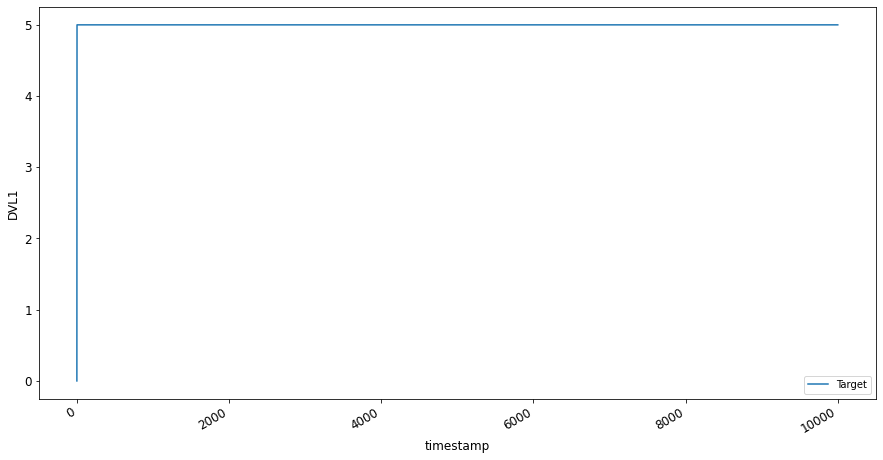

In [14]:
df.plot(y='Target', subplots=True, figsize=(15, 8), fontsize=12)

plt.xlabel('timestamp', fontsize=12)
plt.ylabel('DVL1', fontsize=12)
plt.show()

In [15]:

# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Using TensorFlow backend.


In [0]:
data_to_use = df['Target'].values

In [0]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 7)

In [0]:
X_train  = np.array(X[:9000])
y_train = np.array(y[:9000])

X_test = np.array(X[9000:])
y_test = np.array(y[9000:])

In [20]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (9000, 7, 1)
y_train size: (9000, 1)
X_test size: (994, 7, 1)
y_test size: (994, 1)


In [0]:
dates = df["Target"]
train_date = dates[:9000]
test_date = dates[-994:]


In [25]:
test_date

9007     5.0
9008     5.0
9009     5.0
9010     5.0
9011     5.0
        ... 
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
Name: Target, Length: 994, dtype: float64

In [0]:
# choose a number of time steps
n_steps = 7
# split into samples
#X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]

In [27]:
##learning for confirmedcases

X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# fit model
history=model.fit(X, y, epochs=10, verbose=0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 32)             96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4850      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 4,997
Trainable params: 4,997
Non-trainable params: 0
_________________________________________________________________


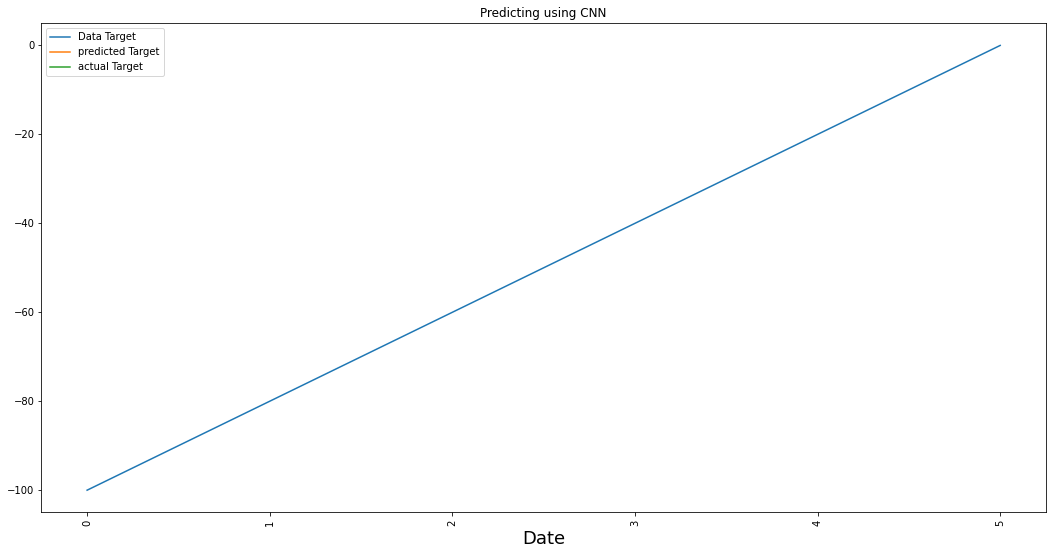

In [33]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
#print(y_pred)
#print(y_test)

plt.figure(figsize = (18,9))
# plt.plot(train_date,train_confirmed,label="Testing Data")
#plt.plot(test_date,pred_conf_cases,label="Predicted Data")
plt.plot(dates,scaled_dataset,label="Data Target")
plt.plot(test_date,y_pred,label="predicted Target")
plt.plot(test_date,y_test,label="actual Target")
 #plt.plot(train_date,X_train,label="training data")
# plt.plot(train_date,X_test,label="testing data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.legend()
plt.title("Predicting using CNN")
plt.show()

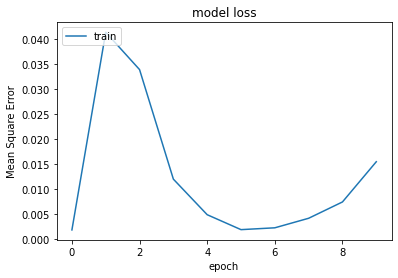

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Cleaning the data set and prepare it to do more and more programming mainly concerning the area where things go well-

In [67]:
df

0        0.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
Name: Target, Length: 10001, dtype: float64

In [0]:

# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
    df

In [46]:
df

0        0.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
Name: Target, Length: 10001, dtype: float64

In [0]:
data_to_use=df

In [49]:
data_to_use

0        0.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
Name: Target, Length: 10001, dtype: float64

In [0]:
scaler = StandardScaler()
scaled_dataset = data_to_use

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 7)

In [0]:
X_train  = np.array(X[:9000])
y_train = np.array(y[:9000])

X_test = np.array(X[9000:])
y_test = np.array(y[9000:])


In [56]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (9000, 7)
y_train size: (9000,)
X_test size: (994, 7)
y_test size: (994,)


In [0]:
dates = df
train_date = dates[:9000]
test_date = dates[-994:]



# choose a number of time steps
n_steps = 7

In [61]:
X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=10, verbose=0)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,

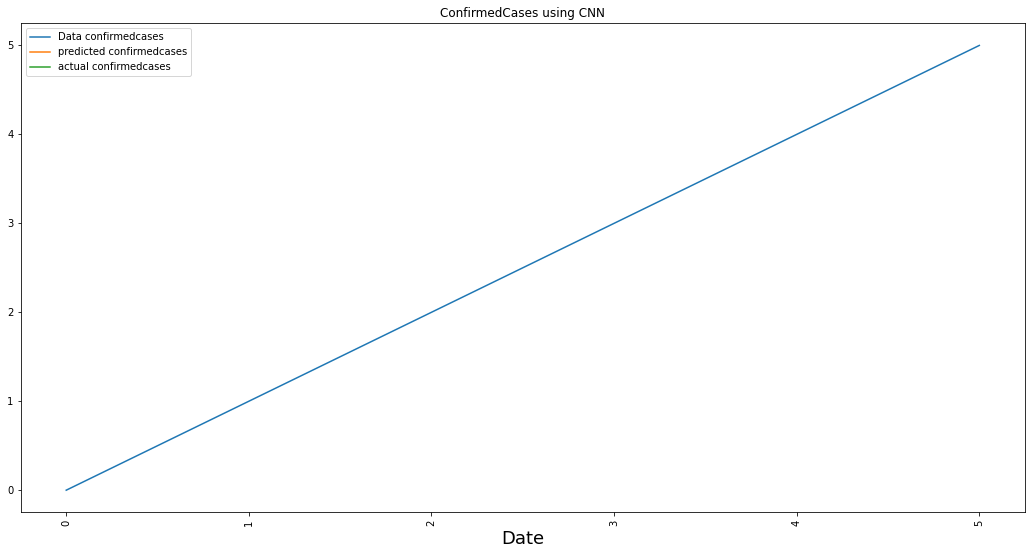

In [62]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
print(y_pred)
print(y_test)

plt.figure(figsize = (18,9))
# plt.plot(train_date,train_confirmed,label="Testing Data")
# plt.plot(test_date,pred_conf_cases,label="Predicted Data")
plt.plot(dates,scaled_dataset,label="Data confirmedcases")
plt.plot(test_date,y_pred,label="predicted confirmedcases")
plt.plot(test_date,y_test,label="actual confirmedcases")
# plt.plot(train_date,X_train,label="training data")
# plt.plot(train_date,X_test,label="testing data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.legend()
plt.title("ConfirmedCases using CNN")
plt.show()

In [63]:
print(y_pred)

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,

In [64]:
len(y_pred)

994

In [65]:
print(y_test)


[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.

In [66]:
len(y_test)

994